In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.graphics.tsaplots as sgt
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('datasets/index2018.csv')

## checkpointing

In [3]:
data=df.copy()


data.date=pd.to_datetime(data.date,dayfirst=True)

data.head()

data.set_index(data.date,inplace=True)

del data['date']

### checkpointing for using only data for spx

In [4]:
spx_price=data.spx.copy()
ftse_price=data.ftse.copy()

## Setting the desired frequency 

In [5]:
spx_price=spx_price.asfreq('b')
spx_price.isna().sum()

8

In [6]:
ftse_price=spx_price.asfreq('b')
ftse_price.isna().sum()

8

## Filling the missing values

In [7]:
spx_price=spx_price.fillna(method='ffill')

spx_price.isna().sum()

0

In [8]:
ftse_price=spx_price.fillna(method='ffill')

ftse_price.isna().sum()

0

## QQ model

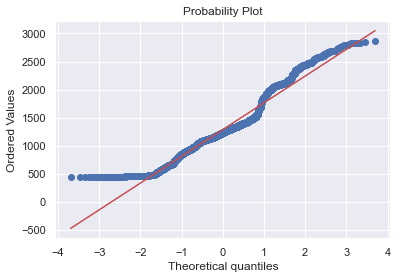

In [9]:
import scipy.stats

scipy.stats.probplot(spx_price, plot=plt)
plt.plot()
plt.show()

## ARIMA MODEL

In [10]:
#importing necessary models
from statsmodels.tsa.arima_model import ARIMA

In [11]:
model_ar_1_i_1_ma_1=ARIMA(spx_price,order=(1,1,1))
result_ar_1_i_1_ma_1=model_ar_1_i_1_ma_1.fit()
result_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.spx   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25246.175
Method:                       css-mle   S.D. of innovations             13.514
Date:                Thu, 27 May 2021   AIC                          50500.349
Time:                        11:31:27   BIC                          50527.327
Sample:                    01-10-1994   HQIC                         50509.697
                         - 01-29-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3794      0.143      2.662      0.008       0.100       0.659
ar.L1.D.spx     0.6538      0.085      7.715      0.000       0.488       0.820
ma.L1.D.spx    -0.7108      0.079     -9.028      0.000      -0.865      -0.556
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5296           +0.0000j            1.5296            0.0000
MA.1            1.4069           +0.0000j            1.4069            0.0000
-----------------------------------------------------------------------------
"""

## LRR TEST

In [12]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1,mod_2,DF=1):
    #Here, DF is the Degree of freedom, the degree of freedom between AR(1) and AR(2) is 1.
    
    L1=mod_1.fit(start_ar_lags=10).llf
    L2=mod_2.fit(start_ar_lags=10).llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [13]:
result_arima={}
for i in range(1,8):
    for j in range(1,8):
        key="result_ar_"+str(i)+"_i_1_ma_"+str(j)
        z=ARIMA(spx_price,order=(i,1,j))
        try:
            value=z.fit()
            result_arima[key]={value.llf,value.aic}
        except:
            for k in range(1,15):
                try:
                    value=z.fit(start_ar_lags=int(k))
                    result_arima[key]={value.llf,value.aic}
                    break
                except:
                    pass
                



1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7


In [14]:
result_arima

{'result_ar_1_i_1_ma_1': {-25246.174658705673, 50500.34931741135},
 'result_ar_1_i_1_ma_2': {-25246.02056973968, 50502.04113947936},
 'result_ar_1_i_1_ma_3': {-25246.01742621555, 50504.0348524311},
 'result_ar_1_i_1_ma_4': {-25245.77630093834, 50505.55260187668},
 'result_ar_1_i_1_ma_5': {-25244.894810513022, 50505.789621026044},
 'result_ar_1_i_1_ma_6': {-25242.71270322655, 50503.4254064531},
 'result_ar_1_i_1_ma_7': {-25239.020773710145, 50498.04154742029},
 'result_ar_2_i_1_ma_1': {-25246.0200300948, 50502.0400601896},
 'result_ar_2_i_1_ma_2': {-25244.77054402487, 50501.54108804974},
 'result_ar_2_i_1_ma_3': {-25242.262287150443, 50498.524574300885},
 'result_ar_2_i_1_ma_4': {-25244.392067721277, 50504.784135442555},
 'result_ar_2_i_1_ma_5': {-25241.43315175606, 50500.86630351212},
 'result_ar_2_i_1_ma_6': {-25241.880168920317, 50503.760337840635},
 'result_ar_2_i_1_ma_7': {-25238.356054659285, 50498.71210931857},
 'result_ar_3_i_1_ma_1': {-25246.01847465842, 50504.03694931684},
 'r

In [15]:
model_ar_4_i_1_ma_5=ARIMA(spx_price,order=(4,1,5))
result_ar_4_i_1_ma_5=model_ar_4_i_1_ma_5.fit(start_ar_lags=9)
print(result_ar_4_i_1_ma_5.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 6276
Model:                 ARIMA(4, 1, 5)   Log Likelihood              -25234.543
Method:                       css-mle   S.D. of innovations             13.489
Date:                Thu, 27 May 2021   AIC                          50491.087
Time:                        11:43:44   BIC                          50565.276
Sample:                    01-10-1994   HQIC                         50516.792
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3796      0.153      2.482      0.013       0.080       0.679
ar.L1.D.spx     0.1082      0.149      0.726      0.468      -0.184       0.400
ar.L2.D.spx     1.2610      0.115     10.928    

In [16]:
model_ar_6_i_1_ma_7=ARIMA(spx_price,order=(6,1,7))
result_ar_6_i_1_ma_7=model_ar_6_i_1_ma_7.fit(start_ar_lags=9)
print(result_ar_6_i_1_ma_7.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 6276
Model:                 ARIMA(6, 1, 7)   Log Likelihood              -25229.188
Method:                       css-mle   S.D. of innovations             13.477
Date:                Thu, 27 May 2021   AIC                          50488.377
Time:                        11:44:10   BIC                          50589.544
Sample:                    01-10-1994   HQIC                         50523.429
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3796      0.152      2.495      0.013       0.081       0.678
ar.L1.D.spx    -0.8984      0.131     -6.876      0.000      -1.155      -0.642
ar.L2.D.spx     0.4231      0.061      6.892    

In [17]:
model_ar_7_i_1_ma_6=ARIMA(spx_price,order=(7,1,6))
result_ar_7_i_1_ma_6=model_ar_7_i_1_ma_6.fit(start_ar_lags=9)
print(result_ar_7_i_1_ma_6.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_4_i_1_ma_5,model_ar_7_i_1_ma_6,DF=4)))

                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 6276
Model:                 ARIMA(7, 1, 6)   Log Likelihood              -25229.380
Method:                       css-mle   S.D. of innovations             13.478
Date:                Thu, 27 May 2021   AIC                          50488.760
Time:                        11:44:42   BIC                          50589.927
Sample:                    01-10-1994   HQIC                         50523.813
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3796      0.153      2.480      0.013       0.080       0.680
ar.L1.D.spx    -0.9587      0.124     -7.749      0.000      -1.201      -0.716
ar.L2.D.spx     0.3312      0.061      5.394    

Here the higher model is not significant as the p value is above 0.05

In [19]:
print("\n LLR test p-value="+str(LLR_test(model_ar_4_i_1_ma_5,model_ar_6_i_1_ma_7,DF=4)))


 LLR test p-value=0.005


As the LLR value from p test is 0.05, the higher model is significant. So <font color="red"> model_ar_6_i_1_ma_7</font> is a good model

### Analysing the Residuals

In [20]:
residuals=result_ar_6_i_1_ma_7.resid

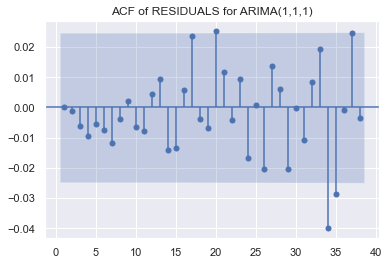

In [21]:
sgt.plot_acf(residuals,zero=False)
plt.title("ACF of RESIDUALS for ARIMA(1,1,1)")
plt.show()

## ARIMAX MODEL

Below, we are setting the exog variable, it can be any variable we are intrested in, like a time-varying variable measurement, a categorical variable , a boolean value, a combination of several different external factor.
But below we have introduced the price of ftse , as out exogenous variable.It also can be market inflation, deflation , GDP and variour factor which can affect the price of the equity .

In [22]:
model_ar_6_i_1_ma_7=ARIMA(spx_price,exog=ftse_price,order=(1,1,1))
result_ar_6_i_1_ma_7=model_ar_6_i_1_ma_7.fit(start_ar_lags=9)
print(result_ar_6_i_1_ma_7.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25241.809
Method:                       css-mle   S.D. of innovations             13.504
Date:                Thu, 27 May 2021   AIC                          50493.618
Time:                        11:49:27   BIC                          50527.340
Sample:                    01-10-1994   HQIC                         50505.302
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7302      0.402     -1.818      0.069      -1.517       0.057
spx             0.0009      0.000      2.952      0.003       0.000       0.001
ar.L1.D.spx     0.6596      0.083      7.973    

In [23]:
outputs_arimax={}
for i in range(1,8):
    for j in range(1,8):
        key="result_ar_"+str(i)+"_i_1_ma_"+str(j)
        z=ARIMA(spx_price,exog=ftse_price,order=(i,1,j))
        try:
            value=z.fit()
            outputs_arimax[key]={value.llf,value.aic}
        except:
            for k in range(1,15):
                try:
                    value=z.fit(start_ar_lags=int(k))
                    outputs_arimax[key]={value.llf,value.aic}
                    break
                except:
                    pass
                


In [24]:
outputs_arimax

{'result_ar_1_i_1_ma_1': {-25241.80879334622, 50493.61758669244},
 'result_ar_1_i_1_ma_2': {-25241.645487476537, 50495.29097495307},
 'result_ar_1_i_1_ma_3': {-25241.642757576243, 50497.285515152485},
 'result_ar_1_i_1_ma_4': {-25241.396541729693, 50498.793083459386},
 'result_ar_1_i_1_ma_5': {-25240.5083128537, 50499.0166257074},
 'result_ar_1_i_1_ma_6': {-25238.415330334665, 50496.83066066933},
 'result_ar_1_i_1_ma_7': {-25234.628532553612, 50491.257065107224},
 'result_ar_2_i_1_ma_1': {-25241.644919736184, 50495.28983947237},
 'result_ar_2_i_1_ma_2': {-25240.39591689456, 50494.79183378912},
 'result_ar_2_i_1_ma_3': {-25238.123549270007, 50492.247098540014},
 'result_ar_2_i_1_ma_4': {-25240.022479260428, 50498.044958520855},
 'result_ar_2_i_1_ma_5': {-25237.208953869413, 50494.417907738825},
 'result_ar_2_i_1_ma_6': {-25237.501971172227, 50497.003942344454},
 'result_ar_2_i_1_ma_7': {-25234.005403922427, 50492.010807844854},
 'result_ar_3_i_1_ma_1': {-25241.643421342887, 50497.286842

In [25]:
model_ar_6_i_1_ma_7=ARIMA(spx_price,exog=ftse_price,order=(7,1,6))
result_ar_6_i_1_ma_7=model_ar_6_i_1_ma_7.fit(start_ar_lags=9)
print(result_ar_6_i_1_ma_7.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 6276
Model:                 ARIMA(7, 1, 6)   Log Likelihood              -25226.336
Method:                       css-mle   S.D. of innovations             13.471
Date:                Thu, 27 May 2021   AIC                          50484.672
Time:                        12:05:59   BIC                          50592.583
Sample:                    01-10-1994   HQIC                         50522.061
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8764      0.433     -2.026      0.043      -1.724      -0.029
spx             0.0010      0.000      3.071      0.002       0.000       0.002
ar.L1.D.spx    -0.7642      0.313     -2.445    

## SARIMAX

In [26]:
#importing necessary module
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
module_sarimax=SARIMAX(spx_price,exgo=ftse_price,order=(1,0,1),seasonal_order=(2,0,1,5))
result_sarimax=module_sarimax.fit()

In [28]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               spx   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -25263.647
Date:                           Thu, 27 May 2021   AIC                          50539.295
Time:                                   12:06:12   BIC                          50579.763
Sample:                               01-07-1994   HQIC                         50553.316
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001    912.648      0.000       0.998       1.002
ma.L1         -0.0598      0.006     -9.911      0.000      -0.072      -0.048
ar.S.L5        0.9724      0.006    160.836      0.000       0.961       0.984
ar.S.L10       0.0275      0.006      4.304      0.000       0.015       0.040
ma.S.L5       -0.9997      0.008   -130.926      0.000      -1.015      -0.985
sigma2       183.0773      1.941     94.342      0.000     179.274     186.881
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7137.51
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""